<a href="https://colab.research.google.com/github/Kavishankarks/trends/blob/main/Gtrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pytrends

In [4]:
import pandas as pd
from pandas import DataFrame

In [71]:
keywords=['deep learning','machine', 'python', 'network', 'image', 'ai', 'neural', 'networks', 'google', 'pdf', 'tensorflow', 'reinforcement', 'learning', 'github', 'model', 'classification', 'book']
dfk=DataFrame(keywords,columns=['Keywords'])
dfk.reset_index(drop=True, inplace=True)
dfk.to_csv('keywords.csv')

In [72]:
dfk

,Keywords
0,deep learning
1,machine
2,python
3,network
4,image
5,ai
6,neural
7,networks
8,google
9,pdf


In [73]:
from pytrends.request import TrendReq
import pandas as pd
import time
startTime = time.time()
pytrend = TrendReq(hl='en-GB', tz=360)

colnames = ["keywords"]
df = pd.read_csv("keywords.csv", names=colnames)
df2 = df["keywords"].values.tolist()
df2.remove("Keywords")

dataset = []

for x in range(0,len(df2)):
     keywords = [df2[x]]
     pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='2004-01-01 2021-06-06',geo='GB')
     data = pytrend.interest_over_time()
     if not data.empty:
          data = data.drop(labels=['isPartial'],axis='columns')
          dataset.append(data)

result = pd.concat(dataset, axis=1)
result.to_csv('trends.csv')

executionTime = (time.time() - startTime)
print('Execution time in sec.: ' + str(executionTime))

Execution time in sec.: 3.810971260070801


In [74]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
df=pd.read_csv('trends.csv')

In [75]:
df.head(75)

,date,deep learning,machine,python,network,image,ai,neural,networks,google,pdf,tensorflow,reinforcement,learning,github,model,classification,book
0,2004-01-01,0,53,36,91,91,61,90,92,7,49,0,48,82,0,92,66,59
1,2004-02-01,0,48,50,96,90,41,100,92,7,55,0,39,91,0,99,79,55
2,2004-03-01,0,51,34,93,100,45,81,84,7,50,0,94,88,0,97,64,59
3,2004-04-01,0,54,41,100,86,60,42,100,9,53,0,64,86,0,100,62,54
4,2004-05-01,0,51,44,95,84,66,64,93,7,54,0,65,100,0,99,67,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2009-11-01,7,44,24,54,59,52,25,39,46,65,0,45,79,3,62,51,87
71,2009-12-01,0,74,23,56,54,47,21,32,44,60,0,45,61,3,58,38,79
72,2010-01-01,6,47,21,56,55,50,23,39,45,64,0,49,68,2,60,44,76
73,2010-02-01,24,48,27,55,54,49,19,38,45,69,0,47,66,2,56,42,71


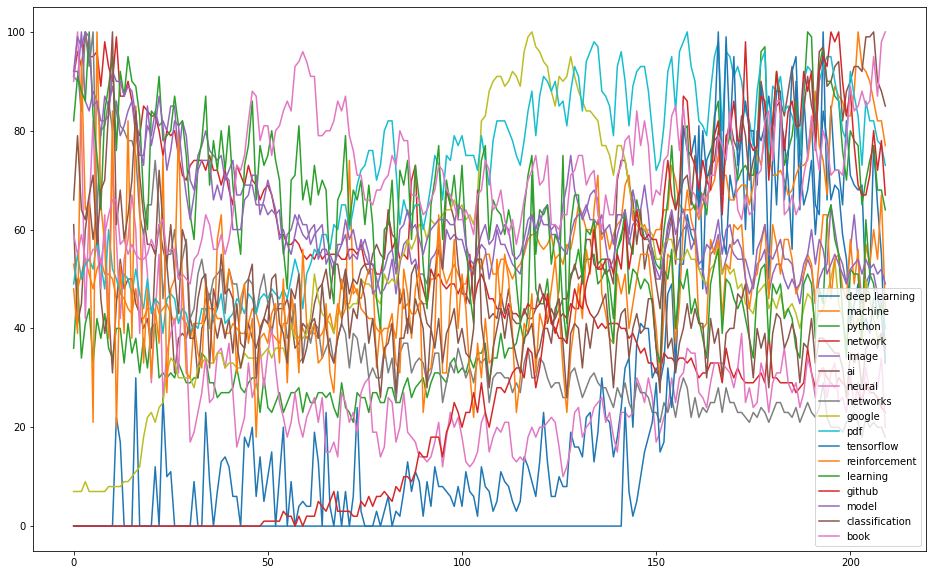

In [76]:
df.plot(figsize=(16,10))

In [79]:
df.corr()

,deep learning,machine,python,network,image,ai,neural,networks,google,pdf,tensorflow,reinforcement,learning,github,model,classification,book
deep learning,1.000000,0.820464,0.899646,-0.704732,-0.457079,0.848170,-0.019706,-0.536497,0.020835,0.607448,0.919191,0.312974,-0.608626,0.889828,-0.426622,-0.323374,0.322100
machine,0.820464,1.000000,0.876830,-0.723536,-0.424900,0.845943,-0.041401,-0.536927,0.197207,0.706443,0.736192,0.298289,-0.590941,0.891301,-0.388980,-0.326016,0.313980
python,0.899646,0.876830,1.000000,-0.680912,-0.336957,0.834773,0.048049,-0.477946,0.125906,0.719347,0.867342,0.339437,-0.572635,0.938306,-0.318501,-0.244245,0.239561
network,-0.704732,-0.723536,-0.680912,1.000000,0.824221,-0.641421,0.544715,0.925805,-0.588667,-0.822788,-0.641672,-0.036103,0.818659,-0.851648,0.828024,0.692480,-0.467739
image,-0.457079,-0.424900,-0.336957,0.824221,1.000000,-0.452768,0.688593,0.868711,-0.489957,-0.575062,-0.432937,0.174293,0.758966,-0.537460,0.899340,0.757752,-0.498167
ai,0.848170,0.845943,0.834773,-0.641421,-0.452768,1.000000,0.022747,-0.476980,-0.019973,0.621644,0.813091,0.328949,-0.532001,0.823701,-0.389925,-0.285916,0.332262
neural,-0.019706,-0.041401,0.048049,0.544715,0.688593,0.022747,1.000000,0.731059,-0.668125,-0.313412,0.043239,0.361629,0.487778,-0.164000,0.752594,0.743271,-0.305223
networks,-0.536497,-0.536927,-0.477946,0.925805,0.868711,-0.476980,0.731059,1.000000,-0.656272,-0.708834,-0.468371,0.076687,0.791401,-0.683128,0.901734,0.802477,-0.457595
google,0.020835,0.197207,0.125906,-0.588667,-0.489957,-0.019973,-0.668125,-0.656272,1.000000,0.647962,-0.051824,-0.213471,-0.393949,0.324862,-0.539375,-0.546665,0.122247
pdf,0.607448,0.706443,0.719347,-0.822788,-0.575062,0.621644,-0.313412,-0.708834,0.647962,1.000000,0.555323,0.189855,-0.637271,0.832755,-0.546733,-0.446267,0.259124


In [109]:
keys=[]
for x in df.corr().iloc[0].index:
  if(a[x]>0.8 or a[x]<(-0.6)):
    keys.append(x)

In [111]:
keys
dfk=DataFrame(keys,columns=['Keywords'])
dfk.reset_index(drop=True, inplace=True)
dfk.to_csv('keywords.csv')

In [112]:
from pytrends.request import TrendReq
import pandas as pd
import time
startTime = time.time()
pytrend = TrendReq(hl='en-GB', tz=360)

colnames = ["keywords"]
df = pd.read_csv("keywords.csv", names=colnames)
df2 = df["keywords"].values.tolist()
df2.remove("Keywords")

dataset = []

for x in range(0,len(df2)):
     keywords = [df2[x]]
     pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='2004-01-01 2021-06-06',geo='GB')
     data = pytrend.interest_over_time()
     if not data.empty:
          data = data.drop(labels=['isPartial'],axis='columns')
          dataset.append(data)

result = pd.concat(dataset, axis=1)
result.to_csv('trends.csv')

executionTime = (time.time() - startTime)
print('Execution time in sec.: ' + str(executionTime))

Execution time in sec.: 3.4305429458618164


In [114]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
df=pd.read_csv('trends.csv')

,deep learning,machine,python,network,ai,tensorflow,learning,github
deep learning,1.000000,0.825736,0.903905,-0.677217,0.854097,0.909915,-0.572119,0.882747
machine,0.825736,1.000000,0.885714,-0.735550,0.854803,0.757130,-0.606539,0.896804
python,0.903905,0.885714,1.000000,-0.685191,0.831079,0.866692,-0.570923,0.938787
network,-0.677217,-0.735550,-0.685191,1.000000,-0.641421,-0.642425,0.821813,-0.848113
ai,0.854097,0.854803,0.831079,-0.641421,1.000000,0.813963,-0.524314,0.821072
tensorflow,0.909915,0.757130,0.866692,-0.642425,0.813963,1.000000,-0.587202,0.844404
learning,-0.572119,-0.606539,-0.570923,0.821813,-0.524314,-0.587202,1.000000,-0.721683
github,0.882747,0.896804,0.938787,-0.848113,0.821072,0.844404,-0.721683,1.000000


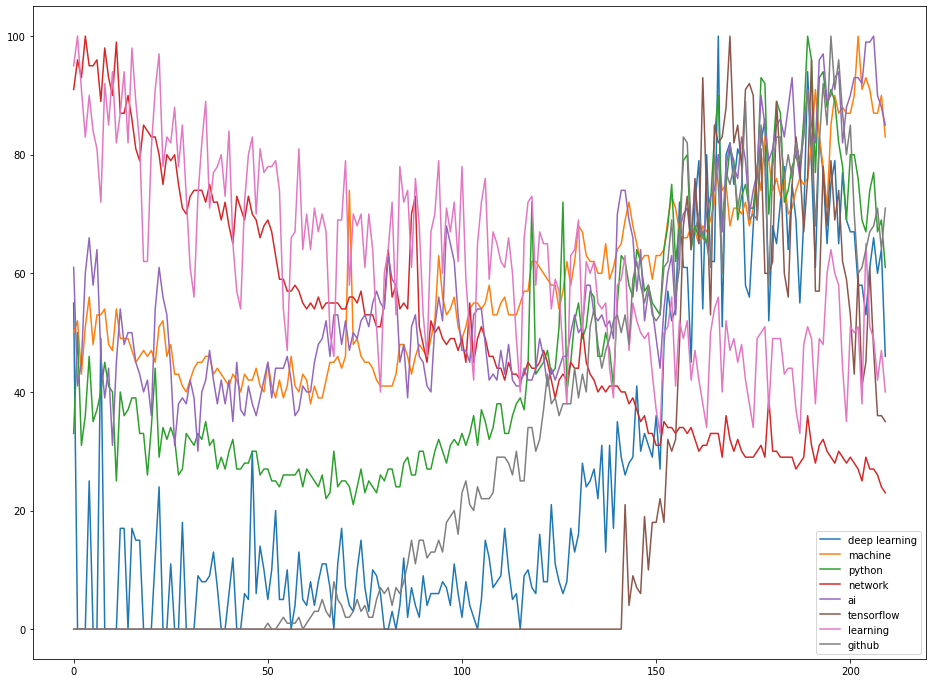

In [117]:
df.plot(figsize=(16,12))
df.corr()

Text(0, 0.5, ' Topic Car ')

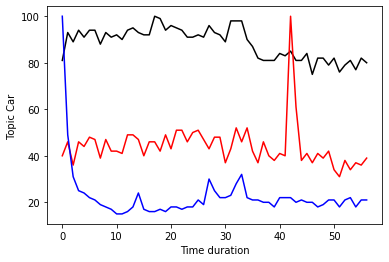

In [ ]:

plt.plot(df.mobile,label='Mobile',color='black')
plt.plot(df.Nokia, label='Nokia',color='red')
plt.plot(df['5g'], label='Nokia',color='blue')
plt.xlabel("Time duration")
plt.ylabel(" Topic Car ")

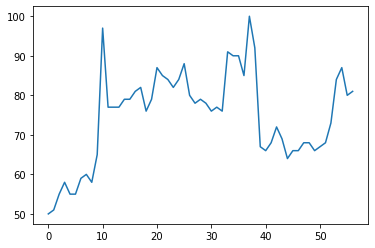

In [ ]:
plt.plot(df.sports)


In [ ]:
from pytrends.request import TrendReq
pytrend = TrendReq(hl='en-IN', tz=360)
df=pytrend.trending_searches()
print(df.head)

<bound method NDFrame.head of                                    0
0                               Loki
1                        Irina Shayk
2                   Battlefield 2042
3                             Bruins
4                 Solar eclipse 2021
5                              Nadal
6                  USA vs Costa Rica
7                       Ernie Lively
8                              Awake
9                       Armie Hammer
10                        Nightbirde
11                       El Salvador
12                       Gerrit Cole
13                       Johnny Depp
14                   Callie Brownson
15                   CMT Awards 2021
16                 Oklahoma softball
17  Lindsey Buckingham Fleetwood Mac
18                       Dwyane Wade
19                        The Weeknd>


In [ ]:
df1=pytrend.trending_searches(pn='india')


In [ ]:
df1

,0
0,जून 10 2021 का सूर्य ग्रहण
1,Sundar Pichai
2,Jharkhand Lockdown news
3,QS World University rankings
4,Shani Jayanti 2021
5,Islamabad United vs Lahore Qalandars
6,MC Kode
7,Maria Sakkari
8,Buddhadeb Dasgupta
9,Kamala Harris


In [ ]:
kw_list = ['Loki']

In [ ]:
Loki=pytrend.get_historical_interest(kw_list, year_start=2018, month_start=1, day_start=1, hour_start=0, year_end=2018, month_end=2, day_end=1, hour_end=0, cat=0, geo='', gprop='', sleep=0)

In [ ]:
Loki.head()


,Loki,isPartial
date,,
2018-01-01 00:00:00,72,False
2018-01-01 01:00:00,89,False
2018-01-01 02:00:00,96,False
2018-01-01 03:00:00,89,False
2018-01-01 04:00:00,100,False


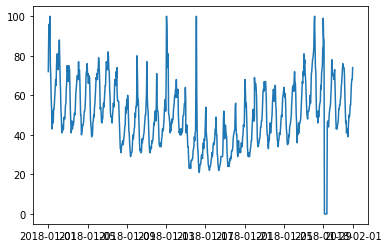

In [ ]:
%matplotlib inline
plt.plot(Loki.Loki)


In [ ]:
from pytrends.request import TrendReq
import pandas as pd
import time
startTime = time.time()
pytrend = TrendReq(hl='en-GB', tz=360)
kw_list=['cricket']

In [ ]:
df=pytrend.get_historical_interest(kw_list, year_start=2018, month_start=1, day_start=1, hour_start=0, year_end=2018, month_end=2, day_end=1, hour_end=0, cat=8, geo='', gprop='', sleep=0)

In [ ]:
df.head(10)

,cricket,isPartial
date,,
2018-01-01 00:00:00,16,False
2018-01-01 01:00:00,28,False
2018-01-01 02:00:00,43,False
2018-01-01 03:00:00,53,False
2018-01-01 04:00:00,61,False
2018-01-01 05:00:00,71,False
2018-01-01 06:00:00,92,False
2018-01-01 07:00:00,94,False
2018-01-01 08:00:00,75,False


In [ ]:
import matplotlib.pyplot as plt
df.columns

Index(['cricket', 'isPartial'], dtype='object')

<AxesSubplot:xlabel='date'>

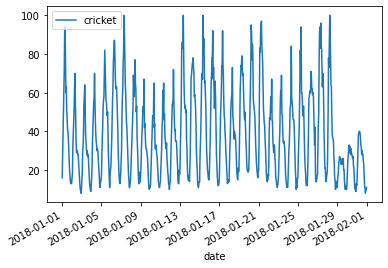

In [ ]:
df.plot()